## Imports

In [3]:
import pandas as pd

In [4]:
import os

## Load Admissions and Patient Data

In [5]:
os.getcwd()

'/home/gaga/yannam/DrugLab/notebooks'

In [6]:
!cd ../data/mimiciii/1.4/ && ls

preprocessed  raw


In [7]:
!ls

Dataset    height_weight_processing.ipynb  Medication-Trend  sql_queries
Drugs	   Medication			   Others
eda.ipynb  Medication-Regression	   Prescription


In [8]:
admissions = pd.read_csv('../data/mimiciii/1.4/raw/ADMISSIONS.csv.gz')

In [9]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [10]:
patients = pd.read_csv('../data/mimiciii/1.4/raw/PATIENTS.csv.gz')

In [11]:
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [12]:
patients['DOB'] = pd.to_datetime(patients['DOB']).dt.date

In [13]:
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME']).dt.date

In [14]:
admissions.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [15]:
patients.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [16]:
admissions = admissions.sort_values(['SUBJECT_ID', 'ADMITTIME']).groupby('SUBJECT_ID').nth(0).reset_index()

In [17]:
temp = pd.merge(admissions, patients, how='inner', on='SUBJECT_ID')

In [18]:
temp['ADMITTIME'], temp['DOB']

(0        2138-07-17
 1        2101-10-20
 2        2191-03-16
 3        2103-02-02
 4        2175-05-30
             ...    
 46515    2181-01-27
 46516    2184-12-24
 46517    2144-07-25
 46518    2147-02-08
 46519    2117-12-30
 Name: ADMITTIME, Length: 46520, dtype: object,
 0        2138-07-17
 1        2025-04-11
 2        2143-05-12
 3        2103-02-02
 4        2109-06-21
             ...    
 46515    2127-04-08
 46516    2137-04-07
 46517    2078-10-17
 46518    2058-05-29
 46519    2054-01-06
 Name: DOB, Length: 46520, dtype: object)

In [19]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

0         0.0
1        77.0
2        48.0
3         0.0
4        66.0
         ... 
46515    54.0
46516    48.0
46517    66.0
46518    89.0
46519    64.0
Length: 46520, dtype: float64

In [20]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 1), axis=1)

0         0.0
1        76.6
2        47.9
3         0.0
4        66.0
         ... 
46515    53.8
46516    47.7
46517    65.8
46518    88.8
46519    64.0
Length: 46520, dtype: float64

In [21]:
temp['AGE'] = temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

In [22]:
temp = temp[temp['AGE']<100]

In [22]:
admissions['SUBJECT_ID']

0            2
1            3
2            4
3            5
4            6
         ...  
46515    99985
46516    99991
46517    99992
46518    99995
46519    99999
Name: SUBJECT_ID, Length: 46520, dtype: int64

## Working with Chartevents

In [24]:
chartevents = pd.read_csv('../data/mimiciii/1.4/raw/CHARTEVENTS.csv.gz')

/a/home/cc/students/csguests/yannam/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (8,10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
chartevents

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249.0,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,15.0,15.00,L/min,0.0,0.0,NaN,NaN
1,789,36,165660,241249.0,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,100.0,100.00,NaN,0.0,0.0,NaN,NaN
2,790,36,165660,241249.0,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823.0,0.37,0.37,NaN,0.0,0.0,NaN,NaN
3,791,36,165660,241249.0,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,6.0,6.00,min,0.0,0.0,NaN,NaN
4,792,36,165660,241249.0,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,2.5,2.50,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330712478,330471885,99781,147562,200664.0,224847,2133-08-02 08:30:00,2133-08-02 08:30:00,14357.0,Moderate,NaN,NaN,0.0,0.0,NaN,NaN
330712479,330471886,99781,147562,200664.0,224889,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,Not applicable,NaN,NaN,0.0,0.0,NaN,NaN
330712480,330471887,99781,147562,200664.0,224903,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,None,NaN,NaN,0.0,0.0,NaN,NaN
330712481,330471888,99781,147562,200664.0,224910,2133-08-02 08:30:00,2133-08-02 08:31:00,14357.0,None,NaN,NaN,0.0,0.0,NaN,NaN


In [27]:
k = chartevents[chartevents['HADM_ID'].isin(temp['HADM_ID'])]

In [29]:
admit_weight = k[k['ITEMID'].isin([762,226512])]
daily_weight = k[k['ITEMID'].isin([763,224639])]
height = k[k['ITEMID'].isin([226730,920, 1394, 4187, 3486,3485,4188])]

## BMI - Admit Weight, Daily Weight and Height Processing

### Weight Processing

In [23]:
admit_weight = pd.read_csv('../data/mimiciii/1.4/preprocessed/admit_weight.csv')

In [24]:
admit_weight.columns

Index(['Unnamed: 0', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID',
       'CHARTTIME', 'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM',
       'WARNING', 'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object')

In [25]:
# admit_weight = admit_weight[admit_weight['VALUE'].notna()]

In [26]:
admit_weight['VALUEUOM'].value_counts()

kg    38898
Name: VALUEUOM, dtype: int64

In [53]:
# admit_weight.to_csv('../data/mimiciii/1.4/preprocessed/admit_weight.csv')

In [27]:
daily_weight = pd.read_csv('../data/mimiciii/1.4/preprocessed/daily_weight.csv')

/a/home/cc/students/csguests/yannam/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# daily_weight = daily_weight[daily_weight['VALUE'].notna()]

In [28]:
daily_weight['VALUEUOM'].value_counts()

kg    69911
Name: VALUEUOM, dtype: int64

In [54]:
# daily_weight.to_csv('../data/mimiciii/1.4/preprocessed/daily_weight.csv')

In [31]:
temp

,SUBJECT_ID,ROW_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,2,1,163353,2138-07-17,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,1,M,2138-07-17,NaN,NaN,NaN,0,0.0
1,3,2,145834,2101-10-20,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,2,M,2025-04-11,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,77.0
2,4,3,185777,2191-03-16,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,0,1,3,F,2143-05-12,NaN,NaN,NaN,0,48.0
3,5,4,178980,2103-02-02,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,4,M,2103-02-02,NaN,NaN,NaN,0,0.0
4,6,5,107064,2175-05-30,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,0,1,5,F,2109-06-21,NaN,NaN,NaN,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,99985,58972,176670,2181-01-27,2181-02-12 17:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,0,1,46516,M,2127-04-08,NaN,NaN,NaN,0,54.0
46516,99991,58973,151118,2184-12-24,2185-01-05 12:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,46517,M,2137-04-07,NaN,NaN,NaN,0,48.0
46517,99992,58974,197084,2144-07-25,2144-07-28 17:56:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,0,1,46518,F,2078-10-17,NaN,NaN,NaN,0,66.0
46518,99995,58975,137810,2147-02-08,2147-02-11 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,0,1,46519,F,2058-05-29,2147-09-29 00:00:00,NaN,2147-09-29 00:00:00,1,89.0


In [72]:
admit_weight.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object')

In [32]:
k = daily_weight[['SUBJECT_ID', 'HADM_ID', 'VALUENUM']].groupby('HADM_ID').median()

In [33]:
k = k.reset_index()

In [34]:
k

,HADM_ID,SUBJECT_ID,VALUENUM
0,100001,58526,107.000000
1,100006,9895,57.000000
2,100007,23018,55.650000
3,100009,533,119.400000
4,100010,55853,83.500000
...,...,...,...
22723,199986,5887,53.950001
22724,199987,28549,136.500000
22725,199993,20785,76.300003
22726,199998,27200,86.300003


In [36]:
merged = pd.concat([admit_weight[['SUBJECT_ID', 'HADM_ID', 'VALUENUM', 'CHARTTIME']], daily_weight[['SUBJECT_ID', 'HADM_ID', 'VALUENUM', 'CHARTTIME']]])

In [38]:
admit_weight.shape, daily_weight.shape

((38898, 16), (69911, 16))

In [37]:
merged

,SUBJECT_ID,HADM_ID,VALUENUM,CHARTTIME
0,165,170252,70.000000,2170-10-03 18:56:00
1,266,186251,61.000000,2168-07-11 07:40:00
2,422,117029,31.400000,2173-04-03 11:54:00
3,533,100009,115.000000,2162-05-17 16:37:00
4,671,126769,73.800000,2195-12-31 05:32:00
...,...,...,...,...
69906,32805,124834,89.000000,2182-12-17 09:00:00
69907,32805,124834,94.199997,2182-12-13 08:00:00
69908,32779,133757,94.199997,2167-10-22 18:00:00
69909,32810,189751,109.699997,2100-09-26 03:00:00


In [39]:
l = merged[['SUBJECT_ID', 'HADM_ID', 'VALUENUM']].groupby('HADM_ID').median()

In [40]:
l = l.reset_index()

In [41]:
l

,HADM_ID,SUBJECT_ID,VALUENUM
0,100001,58526,103.000000
1,100003,54610,85.300000
2,100006,9895,57.000000
3,100007,23018,55.650000
4,100009,533,117.700000
...,...,...,...
33147,199992,94911,53.400000
33148,199993,20785,68.699997
33149,199995,19412,78.000000
33150,199998,27200,82.400002


In [42]:

l_c = merged.sort_values('CHARTTIME').groupby('HADM_ID').nth(0).reset_index()[['SUBJECT_ID', 'HADM_ID', 'CHARTTIME']]
l_c

,SUBJECT_ID,HADM_ID,CHARTTIME
0,58526,100001,2117-09-14 06:00:00
1,54610,100003,2150-04-17 17:50:00
2,9895,100006,2108-04-06 16:30:00
3,23018,100007,2145-04-01 08:00:00
4,533,100009,2162-05-17 16:37:00
...,...,...,...
33147,94911,199992,2155-02-11 19:14:00
33148,20785,199993,2161-10-23 18:37:00
33149,19412,199995,2137-12-20 19:01:00
33150,27200,199998,2119-02-20 13:35:00


In [43]:
median_admit_weight = pd.merge(l, l_c, how='inner', on=['HADM_ID', 'SUBJECT_ID'])

In [44]:
median_admit_weight

,HADM_ID,SUBJECT_ID,VALUENUM,CHARTTIME
0,100001,58526,103.000000,2117-09-14 06:00:00
1,100003,54610,85.300000,2150-04-17 17:50:00
2,100006,9895,57.000000,2108-04-06 16:30:00
3,100007,23018,55.650000,2145-04-01 08:00:00
4,100009,533,117.700000,2162-05-17 16:37:00
...,...,...,...,...
33147,199992,94911,53.400000,2155-02-11 19:14:00
33148,199993,20785,68.699997,2161-10-23 18:37:00
33149,199995,19412,78.000000,2137-12-20 19:01:00
33150,199998,27200,82.400002,2119-02-20 13:35:00


In [45]:

median_admit_weight.to_csv('../data/mimiciii/1.4/preprocessed/median_weights.csv')

### Height

In [46]:
height = pd.read_csv('../data/mimiciii/1.4/preprocessed/height.csv')
height['VALUEUOM'].value_counts()

def height_process(row):
    if row['VALUEUOM'] in ['Inches', 'inches', 'In']:
        return row['VALUE']*0.0254
    else:
        return row['VALUE']*0.01

# height = height[height['VALUE'].notna()]
# height['HEIGHT_M'] = height.apply(lambda row : float(row['VALUE'])*0.0254 if row['VALUEUOM'] in ['Inches', 'inches', 'In'] else float(row['VALUE'])*0.01, axis=1)
# height.to_csv('../data/mimiciii/1.4/preprocessed/height.csv')

In [47]:
height

,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,HEIGHT_M
0,57438,65139,533,100009,253656.0,226730,2162-05-17 16:37:00,2162-05-17 16:37:00,15814.0,183.000000,183.000000,cm,0.0,0.0,NaN,NaN,1.830000
1,108428,105443,877,166453,209705.0,226730,2143-07-01 11:25:00,2143-07-01 11:25:00,15039.0,163.000000,163.000000,cm,0.0,0.0,NaN,NaN,1.630000
2,299841,304901,3379,142774,238507.0,226730,2162-05-27 20:54:00,2162-05-27 20:54:00,17574.0,152.000000,152.000000,cm,0.0,0.0,NaN,NaN,1.520000
3,375475,373089,4502,178493,227049.0,226730,2181-07-30 22:12:00,2181-07-30 22:12:00,19062.0,173.000000,173.000000,cm,0.0,0.0,NaN,NaN,1.730000
4,476158,477928,5547,173495,261963.0,226730,2129-08-09 13:22:00,2129-08-09 13:22:00,19263.0,175.000000,175.000000,cm,0.0,0.0,NaN,NaN,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312874,193743342,193127532,32806,104049,262007.0,4187,2162-11-03 00:00:00,2162-11-03 00:13:00,17604.0,17.716499,17.716499,cm,NaN,NaN,NaN,NotStopd,0.177165
312875,193766462,192824179,32775,128184,292368.0,920,2200-08-29 01:40:00,2200-08-29 01:40:00,21570.0,73.000000,73.000000,inches,NaN,NaN,NaN,NaN,1.854200
312876,193767175,192860324,32779,133757,260977.0,920,2167-10-24 21:00:00,2167-10-24 21:00:00,21570.0,60.000000,60.000000,inches,NaN,NaN,NaN,NaN,1.524000
312877,193769301,193120489,32805,124834,291322.0,920,2182-12-25 18:41:00,2182-12-25 18:41:00,21570.0,72.000000,72.000000,inches,NaN,NaN,NaN,NaN,1.828800


In [52]:
height[height['SUBJECT_ID']==58526]

,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,HEIGHT_M


In [87]:
l = height[['SUBJECT_ID', 'HADM_ID', 'HEIGHT_M']].groupby('HADM_ID').median()
l = l.reset_index()
l

,HADM_ID,SUBJECT_ID,HEIGHT_M
0,100009,533,1.8300
1,100012,60039,1.7800
2,100016,68591,1.3700
3,100017,16229,1.7272
4,100018,58128,1.7800
...,...,...,...
22502,199986,5887,1.5748
22503,199988,25780,1.6256
22504,199993,20785,1.6256
22505,199995,19412,1.8288


In [88]:
l_c = height.sort_values('CHARTTIME').groupby('HADM_ID').nth(0).reset_index()[['SUBJECT_ID', 'HADM_ID', 'CHARTTIME']]
l_c

,SUBJECT_ID,HADM_ID,CHARTTIME
0,533,100009,2162-05-17 16:37:00
1,60039,100012,2177-03-14 12:43:00
2,68591,100016,2188-05-24 16:07:00
3,16229,100017,2103-03-11 09:04:00
4,58128,100018,2176-08-30 15:07:00
...,...,...,...
22502,5887,199986,2188-10-30 20:58:00
22503,25780,199988,2169-02-08 17:51:00
22504,20785,199993,2161-10-23 18:37:00
22505,19412,199995,2137-12-20 19:01:00


In [89]:

median_height = pd.merge(l, l_c, how='inner', on=['HADM_ID', 'SUBJECT_ID'])
median_height

,HADM_ID,SUBJECT_ID,HEIGHT_M,CHARTTIME
0,100009,533,1.8300,2162-05-17 16:37:00
1,100012,60039,1.7800,2177-03-14 12:43:00
2,100016,68591,1.3700,2188-05-24 16:07:00
3,100017,16229,1.7272,2103-03-11 09:04:00
4,100018,58128,1.7800,2176-08-30 15:07:00
...,...,...,...,...
22502,199986,5887,1.5748,2188-10-30 20:58:00
22503,199988,25780,1.6256,2169-02-08 17:51:00
22504,199993,20785,1.6256,2161-10-23 18:37:00
22505,199995,19412,1.8288,2137-12-20 19:01:00


In [90]:
median_height.to_csv('../data/mimiciii/1.4/preprocessed/median_heights.csv')

## BMI

In [91]:
median_weights = pd.read_csv('../data/mimiciii/1.4/preprocessed/median_weights.csv').drop(columns=['Unnamed: 0']).rename(columns={'VALUENUM':'WEIGHT'})
median_heights = pd.read_csv('../data/mimiciii/1.4/preprocessed/median_heights.csv').drop(columns=['Unnamed: 0']).rename(columns={'HEIGHT_M':'HEIGHT'})

In [92]:
median_weights

,HADM_ID,SUBJECT_ID,WEIGHT,CHARTTIME
0,100001,58526,103.000000,2117-09-14 06:00:00
1,100003,54610,85.300000,2150-04-17 17:50:00
2,100006,9895,57.000000,2108-04-06 16:30:00
3,100007,23018,55.650000,2145-04-01 08:00:00
4,100009,533,117.700000,2162-05-17 16:37:00
...,...,...,...,...
33147,199992,94911,53.400000,2155-02-11 19:14:00
33148,199993,20785,68.699997,2161-10-23 18:37:00
33149,199995,19412,78.000000,2137-12-20 19:01:00
33150,199998,27200,82.400002,2119-02-20 13:35:00


In [93]:
median_heights

,HADM_ID,SUBJECT_ID,HEIGHT,CHARTTIME
0,100009,533,1.8300,2162-05-17 16:37:00
1,100012,60039,1.7800,2177-03-14 12:43:00
2,100016,68591,1.3700,2188-05-24 16:07:00
3,100017,16229,1.7272,2103-03-11 09:04:00
4,100018,58128,1.7800,2176-08-30 15:07:00
...,...,...,...,...
22502,199986,5887,1.5748,2188-10-30 20:58:00
22503,199988,25780,1.6256,2169-02-08 17:51:00
22504,199993,20785,1.6256,2161-10-23 18:37:00
22505,199995,19412,1.8288,2137-12-20 19:01:00


In [94]:
merged = pd.merge(median_heights, median_weights, how='inner', on=['SUBJECT_ID', 'HADM_ID'])

In [95]:
merged

,HADM_ID,SUBJECT_ID,HEIGHT,CHARTTIME_x,WEIGHT,CHARTTIME_y
0,100009,533,1.8300,2162-05-17 16:37:00,117.700000,2162-05-17 16:37:00
1,100012,60039,1.7800,2177-03-14 12:43:00,92.500000,2177-03-14 10:55:00
2,100016,68591,1.3700,2188-05-24 16:07:00,50.600000,2188-05-24 16:07:00
3,100017,16229,1.7272,2103-03-11 09:04:00,83.699997,2103-03-11 04:00:00
4,100018,58128,1.7800,2176-08-30 15:07:00,123.500000,2176-08-29 18:59:00
...,...,...,...,...,...,...
18473,199986,5887,1.5748,2188-10-30 20:58:00,54.000000,2188-10-30 17:30:00
18474,199988,25780,1.6256,2169-02-08 17:51:00,78.900002,2169-02-08 17:51:00
18475,199993,20785,1.6256,2161-10-23 18:37:00,68.699997,2161-10-23 18:37:00
18476,199995,19412,1.8288,2137-12-20 19:01:00,78.000000,2137-12-20 19:01:00


In [96]:
merged['CHARTTIME'] = merged.apply(lambda row: row['CHARTTIME_x'] if row['CHARTTIME_x']>row['CHARTTIME_y'] else row['CHARTTIME_y'], axis=1)

In [97]:
merged['BMI'] = merged.apply(lambda row: row['WEIGHT']/(row['HEIGHT']**2) if (row['HEIGHT']!=0 and row['WEIGHT']!=0) else None, axis=1)

In [98]:
merged

,HADM_ID,SUBJECT_ID,HEIGHT,CHARTTIME_x,WEIGHT,CHARTTIME_y,CHARTTIME,BMI
0,100009,533,1.8300,2162-05-17 16:37:00,117.700000,2162-05-17 16:37:00,2162-05-17 16:37:00,35.145869
1,100012,60039,1.7800,2177-03-14 12:43:00,92.500000,2177-03-14 10:55:00,2177-03-14 12:43:00,29.194546
2,100016,68591,1.3700,2188-05-24 16:07:00,50.600000,2188-05-24 16:07:00,2188-05-24 16:07:00,26.959348
3,100017,16229,1.7272,2103-03-11 09:04:00,83.699997,2103-03-11 04:00:00,2103-03-11 09:04:00,28.056932
4,100018,58128,1.7800,2176-08-30 15:07:00,123.500000,2176-08-29 18:59:00,2176-08-30 15:07:00,38.978664
...,...,...,...,...,...,...,...,...
18473,199986,5887,1.5748,2188-10-30 20:58:00,54.000000,2188-10-30 17:30:00,2188-10-30 20:58:00,21.774237
18474,199988,25780,1.6256,2169-02-08 17:51:00,78.900002,2169-02-08 17:51:00,2169-02-08 17:51:00,29.857238
18475,199993,20785,1.6256,2161-10-23 18:37:00,68.699997,2161-10-23 18:37:00,2161-10-23 18:37:00,25.997365
18476,199995,19412,1.8288,2137-12-20 19:01:00,78.000000,2137-12-20 19:01:00,2137-12-20 19:01:00,23.321806


In [99]:
merged.drop(columns=['CHARTTIME_x', 'CHARTTIME_y']).to_csv('../data/mimiciii/1.4/preprocessed/bmi.csv')

## Final Processed BMI Data

In [3]:
import pandas as pd
bmi = pd.read_csv('../data/mimiciii/1.4/preprocessed/bmi.csv').drop(columns=['Unnamed: 0'])

In [4]:
bmi

,HADM_ID,SUBJECT_ID,HEIGHT,WEIGHT,CHARTTIME,BMI
0,100009,533,1.8300,117.700000,2162-05-17 16:37:00,35.145869
1,100012,60039,1.7800,92.500000,2177-03-14 12:43:00,29.194546
2,100016,68591,1.3700,50.600000,2188-05-24 16:07:00,26.959348
3,100017,16229,1.7272,83.699997,2103-03-11 09:04:00,28.056932
4,100018,58128,1.7800,123.500000,2176-08-30 15:07:00,38.978664
...,...,...,...,...,...,...
18473,199986,5887,1.5748,54.000000,2188-10-30 20:58:00,21.774237
18474,199988,25780,1.6256,78.900002,2169-02-08 17:51:00,29.857238
18475,199993,20785,1.6256,68.699997,2161-10-23 18:37:00,25.997365
18476,199995,19412,1.8288,78.000000,2137-12-20 19:01:00,23.321806


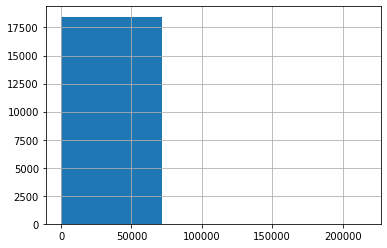

In [5]:
bmi['BMI'].hist(bins=3)